<a href="https://colab.research.google.com/github/Locke0/Text-Summarizer/blob/main/Text_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports


In [22]:
#imports

from nltk.cluster.util import cosine_distance
from nltk.tokenize import word_tokenize

import numpy as np
import networkx as nx
# loading data
import requests


#Helpful Links

https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

##Testing Text

In [23]:
text = '''The Method of Concepts and the Method of Enumeration._--Many authors
are already engaged in this research, and employ a method which I
consider very bad and very dangerous--the method of concepts. This
consists in looking at real and concrete phenomena in their most
abstract form. For example, in studying the mind, they use this word
"mind" as a general idea which is supposed to contain all the
characteristics of psychical phenomena; but they do not wait to
enumerate these characteristics or to realise them, and they remain
satisfied with the extremely vague idea springing from an unanalysed
concept. Consequently they use the word "mind" with the imprudence of
a banker who should discount a trade bill without ascertaining
whether the payment of that particular piece of paper had been
provided for. This amounts to saying that the discussion of
philosophical problems takes especially a verbal aspect; and the more
complex the phenomena a concept thus handled, contains, the more
dangerous it is. A concept of the colour red has but a very simple
content, and by using it, this content can be very clearly
represented. But how can the immense meaning of the word "mind" be
realised every time that it is used? For example, to define mind and
to separate it from the rest of the knowable which is called matter,
the general mode of reasoning is as follows: all the knowable which is
apparent to our senses is essentially reduced to motion; "mind," that
something which lives, feels, and judges, is reduced to "thought." To
understand the difference between matter and mind, it is necessary to
ask one's self whether there exists any analogy in nature between
motion and thought. Now this analogy does not exist, and what we
comprehend, on the contrary, is their absolute opposition. Thought is
not a movement, and has nothing in common with a movement. A movement
is never anything else but a displacement, a transfer, a change of
place undergone by a particle of matter. What relation of similarity
exists between this geometrical fact and a desire, an emotion, a
sensation of bitterness? Far from being identical, these two facts
are as distinct as any facts can be, and their distinction is so deep
that it should be raised to the height of a principle, the principle
of heterogeneity.
'''

# Data Processing


# Loading and Cleaning Data
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0


In [24]:
# text: https://www.gutenberg.org/cache/epub/21077/pg21077.txt
# request tutorial: https://www.youtube.com/watch?v=mKP7ChzJBqg

# loading books
def get_text(url):
  result = requests.get(url)
  result.encoding = result.apparent_encoding
  
  return result.text
# text = get_text('https://www.gutenberg.org/cache/epub/21077/pg21077.txt')

## Remove HTML Tags

In [25]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
  return BeautifulSoup(text, 'html.parser').get_text()

clean_text = remove_html_tags(text)
clean_text

'The Method of Concepts and the Method of Enumeration._--Many authors\nare already engaged in this research, and employ a method which I\nconsider very bad and very dangerous--the method of concepts. This\nconsists in looking at real and concrete phenomena in their most\nabstract form. For example, in studying the mind, they use this word\n"mind" as a general idea which is supposed to contain all the\ncharacteristics of psychical phenomena; but they do not wait to\nenumerate these characteristics or to realise them, and they remain\nsatisfied with the extremely vague idea springing from an unanalysed\nconcept. Consequently they use the word "mind" with the imprudence of\na banker who should discount a trade bill without ascertaining\nwhether the payment of that particular piece of paper had been\nprovided for. This amounts to saying that the discussion of\nphilosophical problems takes especially a verbal aspect; and the more\ncomplex the phenomena a concept thus handled, contains, the 

##Removing Accented Characters

In [26]:
# imports
import unicodedata

# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
clean_text = remove_accented_chars(clean_text)
clean_text

'The Method of Concepts and the Method of Enumeration._--Many authors\nare already engaged in this research, and employ a method which I\nconsider very bad and very dangerous--the method of concepts. This\nconsists in looking at real and concrete phenomena in their most\nabstract form. For example, in studying the mind, they use this word\n"mind" as a general idea which is supposed to contain all the\ncharacteristics of psychical phenomena; but they do not wait to\nenumerate these characteristics or to realise them, and they remain\nsatisfied with the extremely vague idea springing from an unanalysed\nconcept. Consequently they use the word "mind" with the imprudence of\na banker who should discount a trade bill without ascertaining\nwhether the payment of that particular piece of paper had been\nprovided for. This amounts to saying that the discussion of\nphilosophical problems takes especially a verbal aspect; and the more\ncomplex the phenomena a concept thus handled, contains, the 

##Expanding Contractions

In [27]:
# imports
!pip install contractions
import contractions

clean_text = contractions.fix(clean_text)
clean_text

'The Method of Concepts and the Method of Enumeration._--Many authors\nare already engaged in this research, and employ a method which I\nconsider very bad and very dangerous--the method of concepts. This\nconsists in looking at real and concrete phenomena in their most\nabstract form. For example, in studying the mind, they use this word\n"mind" as a general idea which is supposed to contain all the\ncharacteristics of psychical phenomena; but they do not wait to\nenumerate these characteristics or to realise them, and they remain\nsatisfied with the extremely vague idea springing from an unanalysed\nconcept. Consequently they use the word "mind" with the imprudence of\na banker who should discount a trade bill without ascertaining\nwhether the payment of that particular piece of paper had been\nprovided for. This amounts to saying that the discussion of\nphilosophical problems takes especially a verbal aspect; and the more\ncomplex the phenomena a concept thus handled, contains, the 

##Removing Special Characters

In [28]:
# imports
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    text = text.replace('-', ' ')
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)
 
# call function
clean_text = remove_special_characters(clean_text)
# clean_text
clean_text

'The Method of Concepts and the Method of Enumeration._  Many authors\nare already engaged in this research, and employ a method which I\nconsider very bad and very dangerous  the method of concepts. This\nconsists in looking at real and concrete phenomena in their most\nabstract form. For example, in studying the mind, they use this word\n"mind" as a general idea which is supposed to contain all the\ncharacteristics of psychical phenomena; but they do not wait to\nenumerate these characteristics or to realise them, and they remain\nsatisfied with the extremely vague idea springing from an unanalysed\nconcept. Consequently they use the word "mind" with the imprudence of\na banker who should discount a trade bill without ascertaining\nwhether the payment of that particular piece of paper had been\nprovided for. This amounts to saying that the discussion of\nphilosophical problems takes especially a verbal aspect; and the more\ncomplex the phenomena a concept thus handled, contains, the 

##Removing Numbers

In [29]:
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# call function
clean_text = remove_numbers(clean_text)
# clean_text

##Removing extra whitespaces and tabs

In [30]:
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()
# call function
clean_text = remove_extra_whitespace_tabs(clean_text)
# clean_text
clean_text

'The Method of Concepts and the Method of Enumeration._ Many authors are already engaged in this research, and employ a method which I consider very bad and very dangerous the method of concepts. This consists in looking at real and concrete phenomena in their most abstract form. For example, in studying the mind, they use this word "mind" as a general idea which is supposed to contain all the characteristics of psychical phenomena; but they do not wait to enumerate these characteristics or to realise them, and they remain satisfied with the extremely vague idea springing from an unanalysed concept. Consequently they use the word "mind" with the imprudence of a banker who should discount a trade bill without ascertaining whether the payment of that particular piece of paper had been provided for. This amounts to saying that the discussion of philosophical problems takes especially a verbal aspect; and the more complex the phenomena a concept thus handled, contains, the more dangerous i

##Stemming (Not Used in This Project)

In [31]:
# # imports
# from nltk.stem import PorterStemmer
# # function for stemming
# def get_stem(text):
#     stemmer = nltk.porter.PorterStemmer()
#     text = ' '.join([stemmer.stem(word) for word in text.split()])
#     return text
# # call function
# clean_text = get_stem(clean_text)

## Lemmatization (More Accurate Than Stemming)

In [32]:
# imports
import spacy
nlp = spacy.load('en',parse=True,tag=True, entity=True)
# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
# call function
clean_text = get_lem(clean_text)
clean_text

'the Method of concept and the Method of Enumeration . _ many author be already engage in this research , and employ a method which I consider very bad and very dangerous the method of concept . this consist in look at real and concrete phenomenon in their most abstract form . for example , in study the mind , they use this word " mind " as a general idea which be suppose to contain all the characteristic of psychical phenomenon ; but they do not wait to enumerate these characteristic or to realise them , and they remain satisfied with the extremely vague idea spring from an unanalysed concept . consequently they use the word " mind " with the imprudence of a banker who should discount a trade bill without ascertain whether the payment of that particular piece of paper have be provide for . this amount to say that the discussion of philosophical problem take especially a verbal aspect ; and the more complex the phenomenon a concept thus handle , contain , the more dangerous it be . a c

##Removing Stopwords

In [33]:
import nltk
from nltk.tokenize import ToktokTokenizer
nltk.download('stopwords')

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')

# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text
# call function
remove_stopwords(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Method concept Method Enumeration . _ many author already engage research , employ method consider bad dangerous method concept . consist look real concrete phenomenon abstract form . example , study mind , use word " mind " general idea suppose contain characteristic psychical phenomenon ; not wait enumerate characteristic realise , remain satisfied extremely vague idea spring unanalysed concept . consequently use word " mind " imprudence banker discount trade bill without ascertain whether payment particular piece paper provide . amount say discussion philosophical problem take especially verbal aspect ; complex phenomenon concept thus handle , contain , dangerous . concept colour red simple content , use , content clearly represent . immense meaning word " mind " realise every time use ? example , define mind separate rest knowable call matter , general mode reasoning follow : knowable apparent sense essentially reduce motion ; " mind , " something live , feel , judge , reduce " th

##Lower Case



In [34]:
clean_text = clean_text.lower()
clean_text

'the method of concept and the method of enumeration . _ many author be already engage in this research , and employ a method which i consider very bad and very dangerous the method of concept . this consist in look at real and concrete phenomenon in their most abstract form . for example , in study the mind , they use this word " mind " as a general idea which be suppose to contain all the characteristic of psychical phenomenon ; but they do not wait to enumerate these characteristic or to realise them , and they remain satisfied with the extremely vague idea spring from an unanalysed concept . consequently they use the word " mind " with the imprudence of a banker who should discount a trade bill without ascertain whether the payment of that particular piece of paper have be provide for . this amount to say that the discussion of philosophical problem take especially a verbal aspect ; and the more complex the phenomenon a concept thus handle , contain , the more dangerous it be . a c

# Formatting Data

## Generating sentences

In [35]:
# https://stackoverflow.com/questions/44015316/how-to-get-rid-of-punctuation-while-maintaining-url

import string
import re
from string import punctuation

def read_article(text):

  article = text.split('. ')
  sentences = []
  punc_table = {ord(c): None for c in punctuation}

  # Using John Gruber's regex to find the URLs
  gruber = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")


  for sentence in article:
    #deleting any character that IS NOT a-z OR A-Z
    # sentences.append(sentence.replace("--|[^0-9a-zA-Z]+", " ").split(" "))
    # if sentence.find('http') == False and sentence.find('www') == False:
    #   sentence = ''.join([c for c in sentence if c not in string.punctuation])

    sentence = ''.join(t if i % 2 else t.translate(punc_table) for (i, t) in enumerate(gruber.split(sentence)))
    sentences.append(sentence.split())
  return sentences

# sentences = read_article(text)
# sentences

##Similarity matrix

In [36]:
def sentence_similarity(sent1, sent2, stopwords=None):
  if stopwords is None:
    stopwords = []

  # sent1 = [w.lower() for w in sent1]
  # sent2 = [w.lower() for w in sent2]

  all_words = list(set(sent1 + sent2))

  print(all_words)
  # create empty vectors 
  vector1 = [0] * len(all_words)
  vector2 = [0] * len(all_words)

  # build the vector for the first sentence
  for w in sent1:
    if w in stopwords:
      continue
    vector1[all_words.index(w)] += 1

  # build the vector for the second sentence
  for w in sent2:
    if w in stopwords:
      continue
    vector2[all_words.index(w)] += 1

  return 1 - cosine_distance(vector1, vector2)

# sentence_similarity(sentences[2], sentences[4], nltk.corpus.stopwords.words('english'))


In [37]:
# https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/
# https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

def build_similarity_matrix(sentences, stop_words):
  # Create an empty similarity matrix
  similarity_matrix = np.zeros((len(sentences), len(sentences)))
  
  for i1 in range(len(sentences)):
       for i2 in range(len(sentences)):
          if i1 == i2: #ignore if both are same sentences
              continue
          similarity_matrix[i1][i2] = sentence_similarity(sentences[i1], sentences[i2], stop_words)
  return similarity_matrix



# Generate Summary Method

In [38]:
import seaborn as sns
import matplotlib.pylab as plt


def generate_summary(text, top_n=5):
  stop_words = nltk.corpus.stopwords.words('english')
  summarize_text = []

  # Step 1 - Read text and tokenize
  # text = get_text(url)
  sentences =  read_article(text);

  # Step 2 - Generate Similary Martix across sentences
  sentence_similarity_martix = build_similarity_matrix(sentences, stop_words);
  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(sentence_similarity_martix, linewidth= 2, annot=True)
  plt.show()

  # Step 3 - Rank sentences in similarity martix
  sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
  # scores = nx.pagerank(sentence_similarity_graph, max_iter=6000)

  # https://stackoverflow.com/questions/63476389/poweriterationfailedconvergence-poweriterationfailedconvergence-power-i
  scores = nx.pagerank_numpy(sentence_similarity_graph)
  
  # Step 4 - Sort the rank and pick top sentences
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
  print("Indexes of top ranked_sentence order are ", ranked_sentence)
  
  for i in range(top_n):
    print(i)
    print(ranked_sentence)
    summarize_text.append(" ".join(ranked_sentence[i][1]))
  

  # Step 5 - Output the summarize text
  print("Summarize Text: \n", ". ".join(summarize_text))



## Visualizations

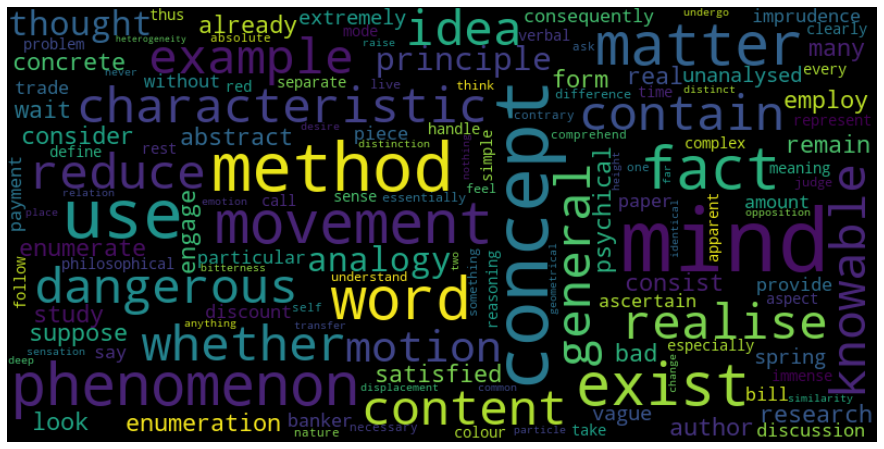

In [39]:
# https://medium.com/swlh/text-classification-using-tf-idf-7404e75565b8

from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sns

def generateWordCloud(corpus: str, cmap: str):
  """
  Return a Word Cloud object generated from the corpus and color map parameter.
  """
  wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                    colormap = cmap, max_words = 180, contour_width = 3,
                    max_font_size = 80, contour_color = 'steelblue',
                    random_state = 0)

  wordcloud.generate(str(remove_stopwords(sentences)))
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

  return wordcloud

generateWordCloud(corpus = sentences, cmap = 'viridis');

## KMeans Clustering

In [40]:
df = pd.DataFrame(clean_text.split('. '), columns=['Sentences'])
df

,Sentences
0,the method of concept and the method of enumer...
1,_ many author be already engage in this resear...
2,this consist in look at real and concrete phen...
3,"for example , in study the mind , they use thi..."
4,"consequently they use the word "" mind "" with t..."
5,this amount to say that the discussion of phil...
6,a concept of the colour red have but a very si...
7,"but how can the immense meaning of the word "" ..."
8,""" to understand the difference between matter ..."
9,"now this analogy do not exist , and what we co..."


In [41]:
# https://datascience.stackexchange.com/questions/24560/k-means-clustering-on-the-data-frame-having-only-one-column

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

X = TfidfVectorizer().fit_transform(df['Sentences'])

km = KMeans(n_clusters=4).fit(X)
df['labels'] = km.labels_.tolist()
df

,Sentences,labels
0,the method of concept and the method of enumer...,0
1,_ many author be already engage in this resear...,0
2,this consist in look at real and concrete phen...,1
3,"for example , in study the mind , they use thi...",2
4,"consequently they use the word "" mind "" with t...",2
5,this amount to say that the discussion of phil...,2
6,a concept of the colour red have but a very si...,0
7,"but how can the immense meaning of the word "" ...",2
8,""" to understand the difference between matter ...",3
9,"now this analogy do not exist , and what we co...",3


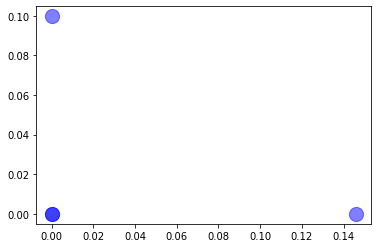

In [48]:
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


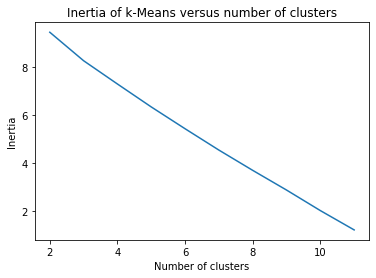

In [43]:
scores = [KMeans(n_clusters=i+2).fit(X).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores);
plt.xlabel('Number of clusters');
plt.ylabel("Inertia");
plt.title("Inertia of k-Means versus number of clusters");

##Summarizing


['bad', 'this', 'research', 'i', 'the', 'a', 'of', 'employ', 'many', 'which', 'enumeration', 'engage', 'very', 'in', 'already', 'consider', 'concept', 'method', 'and', 'be', 'author', 'dangerous']
['phenomenon', 'look', 'form', 'real', 'enumeration', 'consist', 'at', 'concept', 'method', 'this', 'and', 'of', 'in', 'most', 'their', 'the', 'abstract', 'concrete']
['phenomenon', 'or', 'remain', 'them', 'spring', 'example', 'general', 'satisfied', 'from', 'this', 'characteristic', 'unanalysed', 'the', 'a', 'but', 'with', 'idea', 'do', 'these', 'use', 'of', 'an', 'as', 'they', 'to', 'enumerate', 'vague', 'which', 'enumeration', 'study', 'wait', 'in', 'not', 'for', 'word', 'concept', 'suppose', 'method', 'psychical', 'all', 'extremely', 'and', 'be', 'contain', 'realise', 'mind']
['discount', 'imprudence', 'trade', 'ascertain', 'the', 'without', 'whether', 'piece', 'a', 'bill', 'with', 'banker', 'payment', 'use', 'of', 'they', 'have', 'paper', 'enumeration', 'that', 'particular', 'provide', '

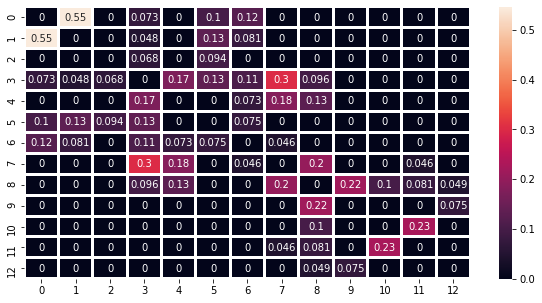

Indexes of top ranked_sentence order are  [(0.13026271261937736, ['to', 'understand', 'the', 'difference', 'between', 'matter', 'and', 'mind', 'it', 'be', 'necessary', 'to', 'ask', 'one', 's', 'self', 'whether', 'there', 'exist', 'any', 'analogy', 'in', 'nature', 'between', 'motion', 'and', 'thought']), (0.12712676459014804, ['for', 'example', 'in', 'study', 'the', 'mind', 'they', 'use', 'this', 'word', 'mind', 'as', 'a', 'general', 'idea', 'which', 'be', 'suppose', 'to', 'contain', 'all', 'the', 'characteristic', 'of', 'psychical', 'phenomenon', 'but', 'they', 'do', 'not', 'wait', 'to', 'enumerate', 'these', 'characteristic', 'or', 'to', 'realise', 'them', 'and', 'they', 'remain', 'satisfied', 'with', 'the', 'extremely', 'vague', 'idea', 'spring', 'from', 'an', 'unanalysed', 'concept']), (0.10249517935717847, ['but', 'how', 'can', 'the', 'immense', 'meaning', 'of', 'the', 'word', 'mind', 'be', 'realise', 'every', 'time', 'that', 'it', 'be', 'use', 'for', 'example', 'to', 'define', 'mi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.


In [49]:
generate_summary(clean_text, top_n=5)